In [181]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cma_utils

In [234]:
def apply_pmd(E_in, DGD_ps_per_sqrt_km, L_m, N_sections, Rs, SpS):

    N_samples = E_in.shape[0]
    SD_tau = np.sqrt(3 * np.pi / 8) * DGD_ps_per_sqrt_km

    tau = (SD_tau * np.sqrt(L_m * 1e-3) / np.sqrt(N_sections)) * 1e-12
    #tau=0
    # w = 2 * np.pi * np.fft.fftshift(np.linspace(-0.5, 0.5, N_samples)) * SpS * Rs
    w = 2 * np.pi * np.linspace(0, N_samples-1, N_samples) / (N_samples / (SpS* Rs))

    E_V = np.fft.fft(E_in[:, 0])
    E_H = np.fft.fft(E_in[:, 1])

    for _ in range(N_sections):
        # Random complex coupling matrices (unitary)
        X = np.random.randn(2, 2) + 1j * np.random.randn(2, 2)
        U, _, Vh = np.linalg.svd(X)
        V = Vh.conj().T

        # # Rotate fields by U†
        # E1 = U[0, 0].conj() * E_V + U[0, 1].conj() * E_H
        # E2 = U[1, 0].conj() * E_V + U[1, 1].conj() * E_H
       
        # Apply differential delay
        E_V *= np.exp(1j * w * tau / 2)
        E_H *= np.exp(-1j * w * tau / 2)

        # # Rotate by V
        # E_V = V[0, 0] * E1 + V[0, 1] * E2
        # E_H = V[1, 0] * E1 + V[1, 1] * E2
      
    E_out_x = np.fft.ifft(E_V)
    E_out_y = np.fft.ifft(E_H)

    return np.column_stack((E_out_x, E_out_y))


Input shape: (3, 2)
[[ 0.70710678+0.70710678j  0.70710678+0.70710678j]
 [ 0.70710678+0.70710678j  0.70710678+0.70710678j]
 [-0.70710678-0.70710678j -0.70710678-0.70710678j]]
Output shape: (3, 2)


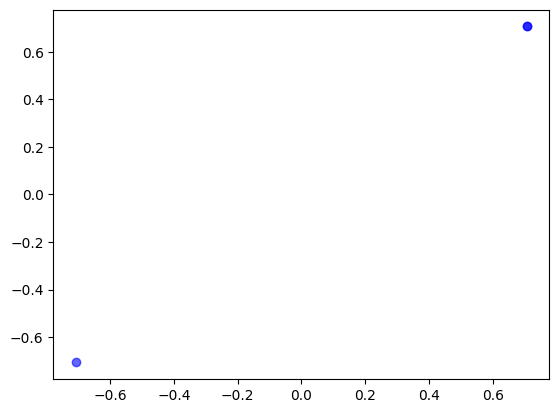

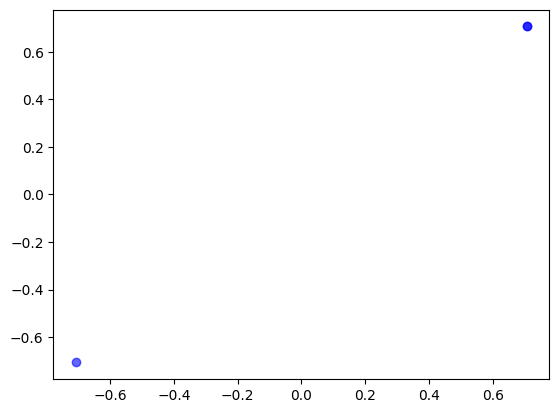

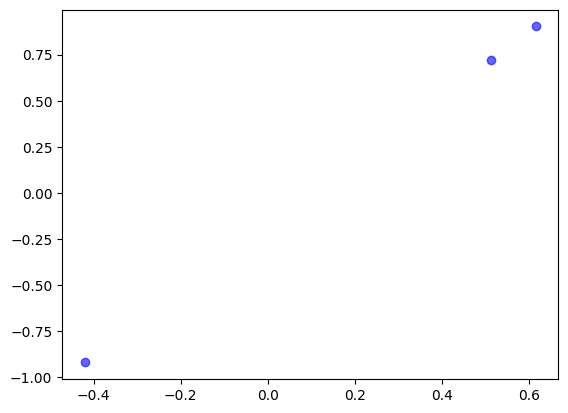

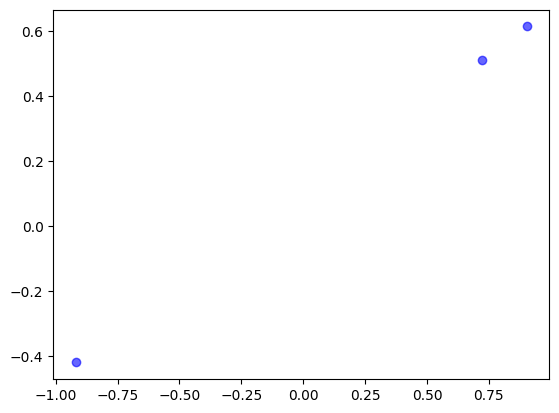

In [240]:
N_symbols = 3
levels = np.array([-1, 1]) / np.sqrt(2)
qam_symbols_x = (np.random.choice(levels, N_symbols) +
               1j * np.random.choice(levels, N_symbols))
qam_symbols_y = (np.random.choice(levels, N_symbols) +
               1j * np.random.choice(levels, N_symbols))

E_in = np.column_stack((qam_symbols_x, qam_symbols_y))  # shape (100, 2)

# check parameters with deepa ma'am
num_taps = 51

E_after_pmd = apply_pmd( 
E_in=E_in, 
# DGD_ps_per_sqrt_km=31.6, # typical mean DGD 
DGD_ps_per_sqrt_km=9.882117,
L_m=10000, # fiber length
N_sections=1, # number of fiber sections 
Rs=32e9, # 32 gbaud
SpS=2 # samples per symbol 
)

print("Input shape:", E_in.shape)
print(E_in)
print("Output shape:", E_after_pmd.shape)
cma_utils.plot_constellation(E_in)
cma_utils.plot_constellation(E_after_pmd)


In [236]:
E_out, taps_converged = cma_utils.cma_python(E_after_pmd, num_taps,mu_CMA=0.001)

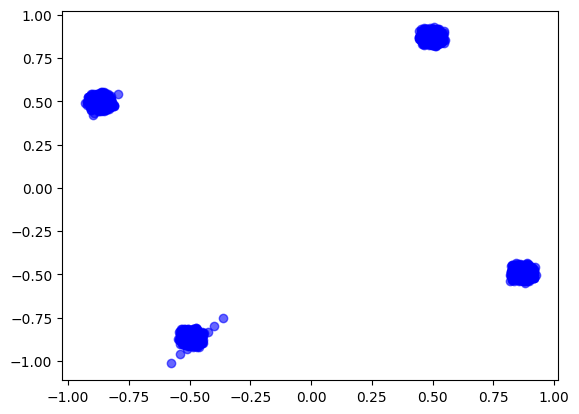

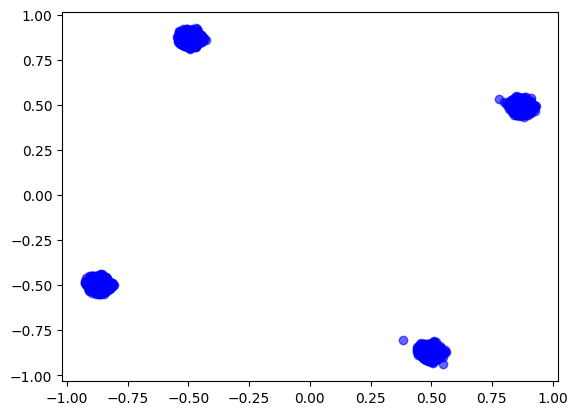

In [237]:
cma_utils.plot_constellation(E_out)

In [238]:
print(pxx)

NameError: name 'pxx' is not defined